<a href="https://colab.research.google.com/github/SalvadorRdR/IAC_2022/blob/salvador/Modelo_IGRF_13_IAC2022_SR_27_2_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


In [2]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF

fatal: destination path 'ppigrf' already exists and is not an empty directory.


In [4]:
import ppigrf

#Data

In [5]:
from datetime import datetime
h   = 560       # kilometers above sea level
date = datetime(2014, 2, 27) #El dia del estudio

Los intervalos de la latitus y longitud que se quiere simular
$$Slice (Lat_{min} , Lat_{max} +dy ,dy) $$
$$Slice (Lon_{min} , Lon_{max} +dx ,dx) $$

In [6]:
#Y-->Latitud
#X-->Longitud
dx, dy = 0.1, 0.1                  # Resolución de cada punto, 
Lat, Lon = np.mgrid[slice(-56, 23 + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(-111, 16 + dx, dx)]

In [7]:
Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)

In [8]:
Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto
Bt=np.squeeze(Bt)

##Plot

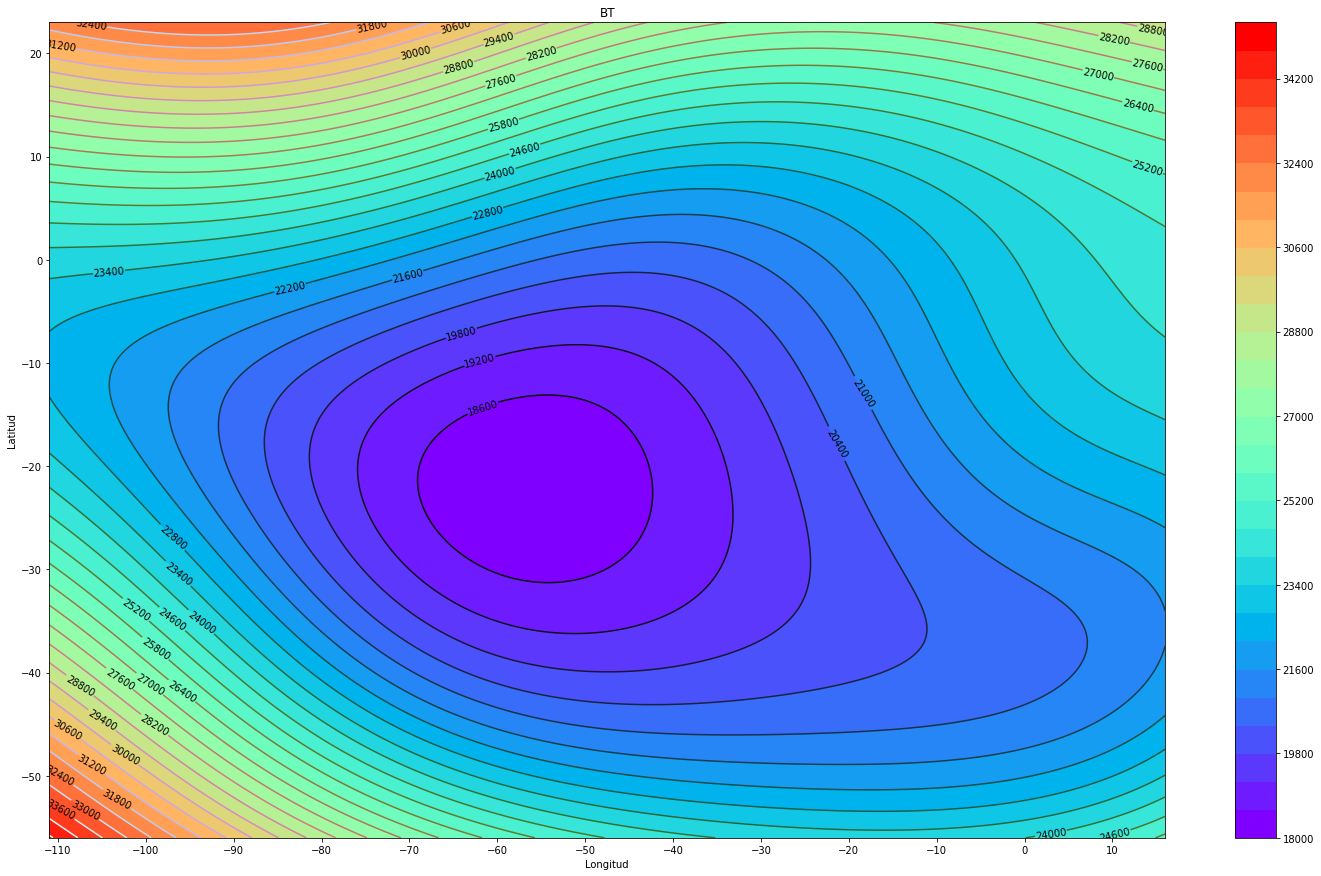

In [9]:

levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico


fig, ax = plt.subplots(figsize = (25,15))

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
cs = plt.contour(Lon, Lat, Bt, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-110,11,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

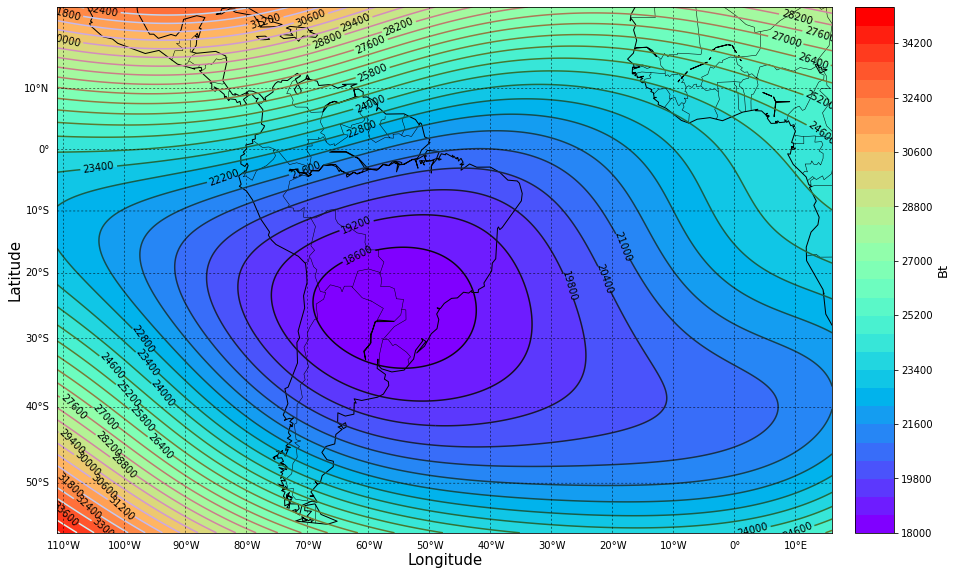

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid


fig = plt.figure(figsize = (15,15))
map = Basemap(projection='mill', 
              lat_0=-55+(17+55)/2, lon_0= -105+(16+105)/2,
              llcrnrlon=-111, 
              llcrnrlat=-56, 
              urcrnrlon=16, 
              urcrnrlat=23,resolution='c')
map.drawcoastlines()
map.drawcountries(linewidth=0.5)
map.drawmeridians(range(-120, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[0, 0, 0, 1])
map.drawparallels(range(-60, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[1, 0, 0, 0])
#map.fillcontinents(color='coral',lake_color='aqua')

data=Bt

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

im=map.pcolormesh(xx, yy, data,cmap=cmap, norm=norm)
cs = map.contour(xx, yy, data, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
cbar = map.colorbar(im, location='right', pad="3%")
cbar.set_label('Bt', fontsize=13)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')

plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)


plt.show()

In [11]:
Lon.shape,Lat.shape, Bt.shape

((791, 1271), (791, 1271), (791, 1271))

#Date Frame

In [12]:
df = pd.DataFrame(Bt,index=Lat[:,0],columns=Lon[0,:]) #Donde cada "y" representa el valor de cada posicion de la Latitud y el "x" representa cada valor de la Longitud.... [Lat,Lon]=Campo magentico(Btij) en ese punto 
print('DataFrame:')
print(df)

DataFrame:
             -111.0        -110.9        -110.8        -110.7        -110.6  \
-56.0  34891.408852  34870.267194  34849.116637  34827.957263  34806.789150   
-55.9  34854.666649  34833.501562  34812.327514  34791.144583  34769.952850   
-55.8  34817.913020  34796.724803  34775.527561  34754.321371  34733.106316   
-55.7  34781.148509  34759.937460  34738.717321  34717.488172  34696.250093   
-55.6  34744.373654  34723.140071  34701.897334  34680.645523  34659.384719   
...             ...           ...           ...           ...           ...   
 22.6  31948.063665  31956.246087  31964.401744  31972.530435  31980.631956   
 22.7  31993.387710  32001.593695  32009.772819  32017.924880  32026.049674   
 22.8  32038.734979  32046.964336  32055.166737  32063.341978  32071.489856   
 22.9  32084.104843  32092.357381  32100.582867  32108.781098  32116.951870   
 23.0  32129.496677  32137.772202  32146.020581  32154.241610  32162.435084   

             -110.5        -110.4       

In [13]:
df.to_csv('MagneticField_T.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


In [14]:
file_name='modelo-igrf13-ctic.xlsx'
df.to_excel(file_name)